In [1]:
from keras.datasets import reuters

import numpy as np

Using TensorFlow backend.


In [0]:
# save np.load
np_load_old = np.load
#Modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

#restore np.load for future normal usage
np.load = np_load_old

In [0]:
## preparing the data
# Encoding the data

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results


In [0]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
## Vectorize the labels (since 'y' is multi-class (not just binary))
## number of output classes = 46
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [7]:
## Building the network

from keras import models
from keras import layers

model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))   ## 46 output classes
## softmax network will output a probability distribution over a 46 different output classes

W0823 14:54:56.679653 140503585122176 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0823 14:54:56.723325 140503585122176 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0823 14:54:56.731894 140503585122176 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [8]:
## Compiling the model
#  loss function: categorical_crossentropy -- it measures the distance between two probability distributions

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

W0823 14:55:00.976235 140503585122176 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0823 14:55:01.011205 140503585122176 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [0]:
## Validating the approach

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [10]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

W0823 14:55:09.468609 140503585122176 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0823 14:55:09.548584 140503585122176 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 233us/step - loss: 2.5241 - acc: 0.4977 - val_loss: 1.7183 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 141us/step - loss: 1.4443 - acc: 0.6889 - val_loss: 1.3496 - val_acc: 0.7090
Epoch 3/20
7982/7982 [==============================] - 1s 155us/step - loss: 1.0993 - acc: 0.7641 - val_loss: 1.1745 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 155us/step - loss: 0.8729 - acc: 0.8157 - val_loss: 1.0842 - val_acc: 0.7580
Epoch 5/20
7982/7982 [==============================] - 1s 158us/step - loss: 0.7061 - acc: 0.8492 - val_loss: 0.9869 - val_acc: 0.7830
Epoch 6/20
7982/7982 [==============================] - 1s 156us/step - loss: 0.5696 - acc: 0.8791 - val_loss: 0.9418 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 155us/step - loss: 0.4626 - acc: 0.9035 - val_loss: 0.9093 - val_acc: 0.8030


In [11]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

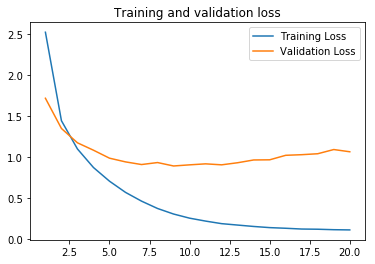

In [12]:
# Plotting training and validation loss

import matplotlib.pyplot as plt

epochs = range(1, len(history_dict['loss'])+1)

loss = history_dict['loss']
val_loss = history_dict['val_loss']

plt.plot(epochs, loss, label="Training Loss")
plt.plot(epochs, val_loss, label="Validation Loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

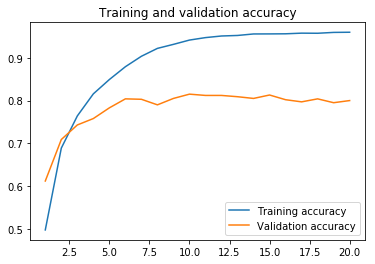

In [13]:
# Plotting training and validation accuracy

plt.clf()

acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, label="Training accuracy")
plt.plot(epochs, val_acc, label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()

plt.show()

In [14]:
## epochs=9 seems to be the optimal value to avoid over-fitting (from above graphs)
# Re-training the model

model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

results

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 175us/step - loss: 2.5395 - acc: 0.5227 - val_loss: 1.6733 - val_acc: 0.6560
Epoch 2/9
7982/7982 [==============================] - 1s 159us/step - loss: 1.3719 - acc: 0.7116 - val_loss: 1.2767 - val_acc: 0.7190
Epoch 3/9
7982/7982 [==============================] - 1s 153us/step - loss: 1.0151 - acc: 0.7784 - val_loss: 1.1313 - val_acc: 0.7510
Epoch 4/9
7982/7982 [==============================] - 1s 154us/step - loss: 0.7987 - acc: 0.8244 - val_loss: 1.0546 - val_acc: 0.7580
Epoch 5/9
7982/7982 [==============================] - 1s 156us/step - loss: 0.6399 - acc: 0.8627 - val_loss: 0.9748 - val_acc: 0.7940
Epoch 6/9
7982/7982 [==============================] - 1s 152us/step - loss: 0.5116 - acc: 0.8928 - val_loss: 0.9087 - val_acc: 0.8130
Epoch 7/9
7982/7982 [==============================] - 1s 154us/step - loss: 0.4110 - acc: 0.9146 - val_loss: 0.8901 - val_acc: 0.8200
Epoch 8

[1.0249817018942013, 0.7747105966692829]